# **Water Quality using Random Forest Classification - Knightbearr**

# **Workflow**

1. Data Collection
2. Data Cleaning & Checking
3. EDA
4. Splitting Data
5. Oversampling model
6. Modeling
7. Prediction Score


note : Sorry if my english is bad, and sorry if i had a mistake. thanks in advance!

# **Import Libraries**

import the module that we want to use for this research.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/water-potability/water_potability.csv


In [2]:
pd.set_option('display.width', 150)
pd.set_option('display.max_columns', 12)
plt.style.use("seaborn-whitegrid")
sns.set_theme(color_codes=True, style='darkgrid', palette='deep', font='sans-serif')

# **Load The Dataset**

Load the dataset that we want to research

In [3]:
waterData = pd.read_csv('../input/water-potability/water_potability.csv')

# **Clean and Checking the Data**

we must check the data every time we want to make a model, because this is the important thing, if you suddenly meet a bad dataset, wether you want it or not, you must clean the data.

In [4]:
# Checking the first 5 rows of data
waterData.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# Checking the last 5 rows of data
waterData.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [6]:
# Getting the statistical measure info
waterData.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
# Getting the information about the dataset
waterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
# Chechking the null data
waterData.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
# Checking the shape of data
waterData.shape

(3276, 10)

**First**, we overcome the null values in the ph column first, and we know that the **ph values less than 6.5 and more than 8.5 are not suitable** for consumption, and the **range of pH that is within the WHO standard is 6.52 - 6.83** , and also we have obtained statistical info from the data above, that the **mean value at pH is 7** which is still within the scope of water that is safe for drinking by humans, so we will fill this empty ph value with the mean value of this ph to improve our model

In [10]:
# Create a new variable named meanPh to hold the value of mean in ph
meanPh = waterData['ph'].mean()

# Fill the blank/null data ph with value of meanPh
waterData['ph'] = waterData['ph'].fillna(meanPh)

# Check the null value and print
print(f'Null Value : {waterData.ph.isnull().sum()}\n')

# Check the data ph
waterData['ph']

Null Value : 0



0       7.080795
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64

**Now**, we overcome the null value in sulfate, and we know that **Sulfate is one of the important ions in the availability of water** because of its important effect for humans when it is available in large quantities. **The maximum sulfate limit in water is about 250 mg/L** for water for human consumption. if we see the statistics info above, **the mean of the Sulfate is 333mg/L**, which mean, that's not good for consumption, and we know that, why the mean value is 333ml/L? this happens because there are so many null values.

In [11]:
# Created a new variable named waterSulfate tohold the value
waterSulfate = (waterData.Sulfate.mean() - waterData.Sulfate.min())

# Fill the blank/null dataSulfate with the value of waterSulfate
waterData['Sulfate'] = waterData['Sulfate'].fillna(waterSulfate)

# Check the null value and print
print(f'Null Value : {waterData.Sulfate.isnull().sum()}')

# Check the data Sulfate
waterData['Sulfate']

Null Value : 0


0       368.516441
1       204.775777
2       204.775777
3       356.886136
4       310.135738
           ...    
3271    359.948574
3272    204.775777
3273    204.775777
3274    204.775777
3275    204.775777
Name: Sulfate, Length: 3276, dtype: float64

**And last**, we deal with Trihalomethanes, what are Trihalomethanes ? **Trihalomethanes (THMs) are among the most dangerous chemical compounds** that find their way into the water supply. The concentration of THM in drinking water varies according to the level of organic matter in the water, the amount of chlorine required to treat the water, and the temperature of the treated water. **THM levels up to 80 ppm are considered safe** in drinking water. and if we see the statistical measure above, we can see the max value of thm is so high almost doubled value of thm, which that means is bad for consume.


In [12]:
# Created a new variable named waterTrihalomethanes to hold the value
waterTrihalomethanes = waterData.Trihalomethanes.mean()

# Fill the blank/null data Trihalomethanes with the value of waterTrihalomethanes
waterData['Trihalomethanes'] = waterData['Trihalomethanes'].fillna(waterTrihalomethanes)

# Check the null value and print
print(f'Null Value : {waterData.Trihalomethanes.isnull().sum()}')

# Check the data Sulfate
waterData['Trihalomethanes']

Null Value : 0


0        86.990970
1        56.329076
2        66.420093
3       100.341674
4        31.997993
           ...    
3271     66.687695
3272     66.396293
3273     69.845400
3274     77.488213
3275     78.698446
Name: Trihalomethanes, Length: 3276, dtype: float64

**Checking again**

In [13]:
# Checking data and print
print(f'Isnull ? :\n{waterData.isnull().sum()}\n')

# Checking data and print
print(f'Is all the data is True ? :\n{waterData.any()}\n')

# Count the value and print
print(f'Potability :\n{waterData.Potability.value_counts()}\n')

# Check the shape and print
print(f'Data Shape : {waterData.shape}')

Isnull ? :
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Is all the data is True ? :
ph                 True
Hardness           True
Solids             True
Chloramines        True
Sulfate            True
Conductivity       True
Organic_carbon     True
Trihalomethanes    True
Turbidity          True
Potability         True
dtype: bool

Potability :
0    1998
1    1278
Name: Potability, dtype: int64

Data Shape : (3276, 10)


In [14]:
# Getting the statistical measure info
waterData.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,303.022114,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,65.792444,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,240.722848,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,318.660382,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# **EDA**

analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [15]:
# Make a correlation data to knowing Value Strength and Direction of Linear Relationship
corr = waterData.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.010523,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.058048,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.073495,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.010185,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.010523,-0.058048,-0.073495,0.010185,1.000000,-0.020208,0.034355,-0.023300,-0.003089,0.003002
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.020208,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.034355,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.023300,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.003089,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,0.003002,-0.008128,-0.030001,0.006960,0.001581,1.000000


In [16]:
# Checking the structure of the data
waterData.sample(11, random_state=1).T

,136,600,1784,3061,2779,1334,366,2164,393,984,1946
ph,6.063355,7.080795,9.252857,3.989032,9.454119,5.742533,4.037288,7.038092,6.775583,7.080795,6.628427
Hardness,160.767311,233.020134,168.040751,216.076138,224.817132,182.941032,291.461897,204.923285,218.414929,238.409598,215.245532
Solids,14775.145596,27071.118618,50279.262429,40175.206091,21379.963927,21293.889754,52318.917298,24607.088098,17968.882775,26493.076207,18059.330852
Chloramines,7.484104,6.220936,5.905056,7.487423,5.407692,6.826413,7.779459,8.080156,8.254115,8.669944,6.931787
Sulfate,305.828553,298.112645,415.450810,309.800796,227.665635,306.543072,204.775777,280.745623,204.775777,311.553679,204.775777
Conductivity,327.270239,357.119622,400.003589,399.047181,431.613001,435.234727,401.204271,365.845248,358.717677,369.283864,374.455062
Organic_carbon,12.309016,16.768945,11.949854,11.186739,15.772334,11.144072,16.542921,10.807557,10.520161,11.759930,11.621074
Trihalomethanes,69.038454,51.284401,62.256881,86.957464,52.033845,68.612391,87.814800,59.912442,57.244111,91.239299,77.940822
Turbidity,3.467337,4.284879,3.300586,4.409414,4.058626,4.272203,3.045049,4.237698,4.333636,3.241267,3.405279
Potability,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000


[]

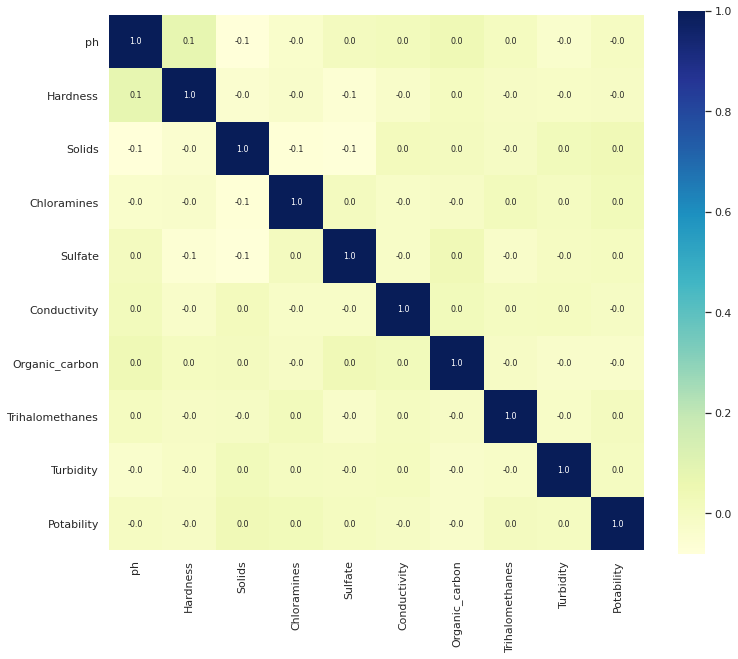

In [17]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='YlGnBu')
plt.plot()

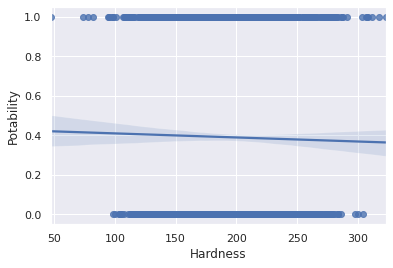

In [18]:
# Create Regression Plot
sns.regplot(x=waterData.Hardness, y=waterData.Potability, data=waterData)
plt.show()

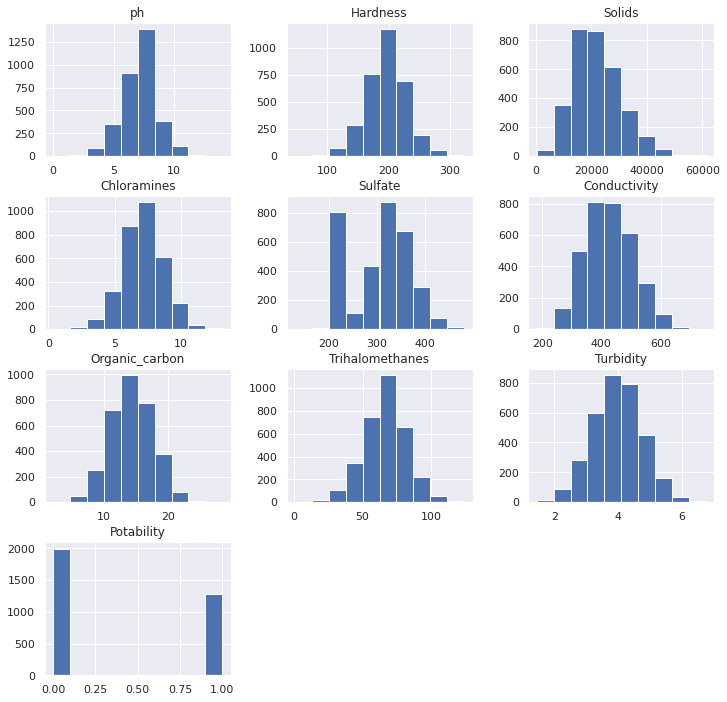

In [19]:
# Create a histogram plot
waterData.hist(figsize=(12,12))
plt.show()

**Coefficient of Variation**

The coefficient of variation is a measure of variance that can be used to compare a data distribution that has different units.

* **The higher the Coefficient of Variation** = the wider the data you have compared to the average data (more difficult to predict)
* **The Lower Coefficient of Variation** = The narrower the data you have compared to the Average data (Easier to predict)

In [20]:
# Coefficient of Potability
covPota = ((waterData['Potability'].std()/waterData['Potability'].mean()) * 100)
print(f'Coefficient Of Variation Potability : {covPota}%')

Coefficient Of Variation Potability : 125.05429419716239%


as you can see the output above, the coefficient of variation is so high, which mean, is so difficult to predict 

In [21]:
# Getting the Mutual Information about the data
X = waterData.copy()
y = X.pop('Potability')

# All discrete features should now have integer dtypes
discreateFeatures = X.dtypes == int

In [22]:
# Make a function
def makeMiScores(X, y, discreateFeatures):
    miScores = mutual_info_regression(X, y, discrete_features=discreateFeatures)
    miScores = pd.Series(miScores, name='MI Scores', index=X.columns)
    miScores = miScores.sort_values(ascending=False)
    return miScores

miScores = makeMiScores(X, y, discreateFeatures)
miScores # show a features with their MI scores

Hardness           0.026560
Conductivity       0.007077
Organic_carbon     0.004014
Turbidity          0.003075
ph                 0.002507
Solids             0.001066
Chloramines        0.000000
Sulfate            0.000000
Trihalomethanes    0.000000
Name: MI Scores, dtype: float64

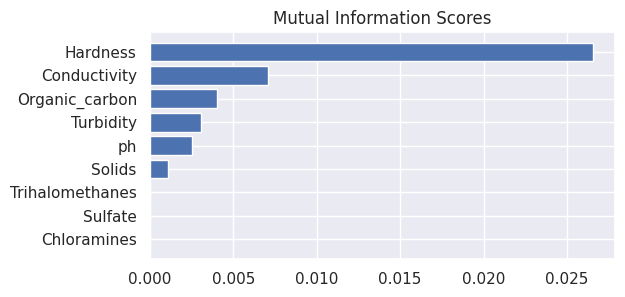

In [23]:
# And now bar plot to make comparisons easier
def plotMiScores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Figuring the plot and plotting
plt.figure(dpi=100, figsize=(6, 3))
plotMiScores(miScores)

Data visualization is a great follow-up to a utility ranking. as we can see the **Hardness, Conductivity, Organic, Turbidity, Solids, and ph have a mutual information** with Potability.

# **Splitting the Data**

divide the data and split it using train test split module from sklearn.

In [24]:
# Divide the data
X = waterData.drop(['Potability'], axis=1)
y = waterData['Potability']

In [25]:
# Splitting Data
trainX, testX, \
trainY, testY = train_test_split(X, y, 
                                test_size=.1, 
                                random_state=12)

In [26]:
# Checking the Target
trainY.value_counts()

0    1801
1    1147
Name: Potability, dtype: int64

In [27]:
# Checking the Target
testY.value_counts()

0    197
1    131
Name: Potability, dtype: int64

# **Upsampling the Target**

upsampling the target using SMOTE, upsampling the target, because we can see the portability and not portability data is have a  huge difference.

In [28]:
sm = SMOTE(random_state=12)
trainXres, trainYres = sm.fit_resample(trainX, trainY)

# **Train and Fit the model**

Train and fit the model using **RandomForestClassifier** Algorithm.

In [29]:
model = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, random_state=12)
model = model.fit(trainXres, trainYres)

**Pipelines** are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

In [30]:
myPipeline = Pipeline(steps=[('model', model)])

In [31]:
# Train Predict
predTrain = myPipeline.predict(trainXres)
print(metrics.classification_report(trainYres, predTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1801
           1       1.00      1.00      1.00      1801

    accuracy                           1.00      3602
   macro avg       1.00      1.00      1.00      3602
weighted avg       1.00      1.00      1.00      3602



In [32]:
# Test Predict
predTest = myPipeline.predict(testX)
print(metrics.classification_report(testY, predTest))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       197
           1       0.59      0.51      0.55       131

    accuracy                           0.66       328
   macro avg       0.65      0.64      0.64       328
weighted avg       0.66      0.66      0.66       328

